In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [41]:
df=pd.read_csv('NFL_Player_Stats_1999_2013.csv')

In [42]:
df.head(20)

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,DOB,Draft Round,Draft Year,Wonderlic,40�Yard,Bench Press,Vert Leap�(in),Broad Jump�(in),Shuttle,3Cone
0,2006,LaDainian Tomlinson,27,Rosebud,TX,SDG,16,16,2.0,3.0,...,23-06-1979,1,2001,0.0,4.46,18.0,40.5,0.0,4.21,6.84
1,2013,Peyton Manning,37,New Orleans,LA,DEN,16,16,450.0,659.0,...,24-03-1976,1,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,Tom Brady,30,San Mateo,CA,NWE,16,16,398.0,578.0,...,03-08-1977,6,2000,33.0,5.28,0.0,24.5,99.0,4.38,7.20
3,2011,Aaron Rodgers,28,Chico,CA,GNB,15,15,343.0,502.0,...,02-12-1983,1,2005,39.0,4.71,0.0,34.5,110.0,0.00,7.39
4,2011,Drew Brees,32,Austin,TX,NOR,16,16,468.0,657.0,...,15-01-1979,2,2001,28.0,4.83,0.0,32.0,105.0,4.21,7.09
5,2004,Daunte Culpepper,27,Ocala,FL,MIN,16,16,379.0,548.0,...,28-01-1977,1,1999,18.0,4.52,0.0,39.0,122.0,4.13,7.21
6,2000,Marshall Faulk,27,New Orleans,LA,STL,14,14,0.0,0.0,...,26-02-1973,1,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011,Cam Newton,22,College Park,GA,CAR,16,16,310.0,517.0,...,11-05-1989,1,2011,21.0,4.56,0.0,35.0,126.0,4.18,6.92
8,2003,Priest Holmes,30,Fort Smith,AR,KAN,16,16,0.0,1.0,...,07-10-1973,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2002,Priest Holmes,29,Fort Smith,AR,KAN,14,14,0.0,1.0,...,07-10-1973,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.shape

(8198, 39)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8198 entries, 0 to 8197
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8198 non-null   int64  
 1   Player           8198 non-null   object 
 2   Age              8198 non-null   int64  
 3   Hometown         8198 non-null   object 
 4   Home State       7972 non-null   object 
 5   Tm               8198 non-null   object 
 6   G                8198 non-null   int64  
 7   GS               8198 non-null   int64  
 8   Cmp              8197 non-null   float64
 9   Att              8197 non-null   float64
 10  Yds              8197 non-null   float64
 11  TD               8197 non-null   float64
 12  Int              8197 non-null   float64
 13  Att.1            8197 non-null   float64
 14  Yds.1            8197 non-null   float64
 15  Y/A              4212 non-null   float64
 16  TD.1             8197 non-null   float64
 17  Rec           

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8198.0,2006.132959,4.324761,1999.00,2002.000,2006.000000,2010.000000,2013.00
Age,8198.0,26.650525,3.480960,21.00,24.000,26.000000,29.000000,44.00
G,8198.0,11.232740,5.193792,0.00,7.000,14.000000,16.000000,16.00
GS,8198.0,5.513296,5.849272,0.00,0.000,3.000000,11.000000,16.00
Cmp,8197.0,18.477126,65.849143,0.00,0.000,0.000000,0.000000,468.00
Att,8197.0,30.857509,108.014209,0.00,0.000,0.000000,0.000000,727.00
Yds,8197.0,213.015493,765.834609,-6.00,0.000,0.000000,0.000000,5477.00
TD,8197.0,1.269123,4.894399,0.00,0.000,0.000000,0.000000,55.00
Int,8197.0,0.943760,3.307804,0.00,0.000,0.000000,0.000000,29.00
Att.1,8197.0,24.948762,62.172422,0.00,0.000,1.000000,12.000000,416.00


In [48]:
df['Total_Yds'] = df['Yds'] + df['Yds.1'] + df['Yds.2']
df['Total_TD'] = df['TD'] + df['TD.1'] + df['TD.2']
df['Total_Att'] = df['Att'] + df['Att.1'] + df['Att']
df['Total_Y_A'] = df['Total_Att'] / df['Total_Yds']
df['Avg_GS'] = df['GS'] / df['G']

In [49]:
df['UID'] = df['Player'] + df['Home State']

In [50]:
df.columns

Index(['Year', 'Player', 'Age', 'Hometown', 'Home State', 'Tm', 'G', 'GS',
       'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1',
       'Rec', 'Yds.2', 'Y/R', 'TD.2', 'FantPos', 'FantPt', 'Height (inches)',
       'Weight', 'College', 'Conference', 'College wins', 'College losses',
       'DOB', 'Draft Round', 'Draft Year', 'Wonderlic', '40�Yard',
       'Bench Press', 'Vert Leap�(in)', 'Broad Jump�(in)', 'Shuttle', '3Cone',
       'Total_Yds', 'Total_TD', 'Total_Att', 'Total_Y_A', 'Avg_GS', 'UID'],
      dtype='object')

In [54]:
player_dict={'Year':"count", 'Player':'first', 'Age':'max', 'Hometown':'first', 'Home State':'first', 'Tm':'count', 'G':'sum', 'GS':'sum',
       'Cmp':'sum', 'Att':'sum', 'Yds':'sum', 'TD':'sum', 'Int':'sum', 'Att.1':'sum', 'Yds.1':'sum', 'Y/A':'sum', 'TD.1':'sum',
       'Rec':'sum', 'Yds.2':'sum', 'Y/R':'sum', 'TD.2':'sum', 'FantPos':'first','FantPt':'sum', 'Height (inches)':'mean',
       'Weight':'mean', 'College':'first', 'Conference':'first', 'College wins':'first', 'College losses':'first',
       'DOB':'first', 'Draft Round':'first', 'Draft Year':'first', 'Wonderlic':'first',
       'Bench Press':'first',  'Shuttle':'first', '3Cone':'first','Total_Yds':'sum', 'Total_TD':'sum', 'Total_Att':'sum', 'Total_Y_A':'sum', 'Avg_GS':'sum','UID':'first'}

In [55]:
#groupby player
df_player = df.groupby('Player',as_index=False).agg(player_dict)

In [56]:
#head()
df_player.head()

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
0,6,A.J. Feeley,34,Caldwell,ID,6,28,18,425.0,762.0,...,NaN,NaN,NaN,NaN,4667.0,29.0,1561.0,1.773987,2.827273,A.J. FeeleyID
1,3,A.J. Green,25,Summerville,SC,3,47,47,0.0,0.0,...,10.0,18.0,4.21,6.91,3924.0,29.0,9.0,0.007386,3.000000,A.J. GreenSC
2,2,A.J. Jenkins,24,Jacksonville,FL,2,19,1,0.0,0.0,...,0.0,12.0,0.00,0.00,136.0,0.0,2.0,0.014706,0.062500,A.J. JenkinsFL
3,1,A.J. Ofodile,26,Detroit,MI,1,7,3,0.0,0.0,...,NaN,NaN,NaN,NaN,25.0,0.0,0.0,0.000000,0.428571,A.J. OfodileMI
4,7,Aaron Brooks,30,Newport News,VA,7,93,90,1673.0,2963.0,...,17.0,35.5,4.29,7.52,21796.0,136.0,6288.0,2.029161,6.625000,Aaron BrooksVA


In [57]:
df_player.shape

(2302, 42)

In [58]:
#Groupby UID
df_player[df_player.duplicated('Player',keep='last')]

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID


In [61]:
df['UID'] = df['Player'] + df['Home State']

In [62]:
df.head()

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Vert Leap�(in),Broad Jump�(in),Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
0,2006,LaDainian Tomlinson,27,Rosebud,TX,SDG,16,16,2.0,3.0,...,40.5,0.0,4.21,6.84,2343.0,33.0,354.0,0.151088,1.0,LaDainian TomlinsonTX
1,2013,Peyton Manning,37,New Orleans,LA,DEN,16,16,450.0,659.0,...,NaN,NaN,NaN,NaN,5446.0,56.0,1350.0,0.247888,1.0,Peyton ManningLA
2,2007,Tom Brady,30,San Mateo,CA,NWE,16,16,398.0,578.0,...,24.5,99.0,4.38,7.20,4904.0,52.0,1193.0,0.243271,1.0,Tom BradyCA
3,2011,Aaron Rodgers,28,Chico,CA,GNB,15,15,343.0,502.0,...,34.5,110.0,0.00,7.39,4900.0,48.0,1064.0,0.217143,1.0,Aaron RodgersCA
4,2011,Drew Brees,32,Austin,TX,NOR,16,16,468.0,657.0,...,32.0,105.0,4.21,7.09,5562.0,47.0,1335.0,0.240022,1.0,Drew BreesTX


In [65]:
#Groupby UID
df_player = df.groupby('UID',as_index=False).agg(player_dict)

In [67]:
df_player.head()

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
0,6,A.J. Feeley,34,Caldwell,ID,6,28,18,425.0,762.0,...,NaN,NaN,NaN,NaN,4667.0,29.0,1561.0,1.773987,2.827273,A.J. FeeleyID
1,3,A.J. Green,25,Summerville,SC,3,47,47,0.0,0.0,...,10.0,18.0,4.21,6.91,3924.0,29.0,9.0,0.007386,3.000000,A.J. GreenSC
2,2,A.J. Jenkins,24,Jacksonville,FL,2,19,1,0.0,0.0,...,0.0,12.0,0.00,0.00,136.0,0.0,2.0,0.014706,0.062500,A.J. JenkinsFL
3,1,A.J. Ofodile,26,Detroit,MI,1,7,3,0.0,0.0,...,NaN,NaN,NaN,NaN,25.0,0.0,0.0,0.000000,0.428571,A.J. OfodileMI
4,7,Aaron Brooks,30,Newport News,VA,7,93,90,1673.0,2963.0,...,17.0,35.5,4.29,7.52,21796.0,136.0,6288.0,2.029161,6.625000,Aaron BrooksVA


## Visualisation

In [70]:
px.histogram(df_player,x='Age',marginal='rug',hover_name='Home State')

<AxesSubplot:ylabel='Frequency'>

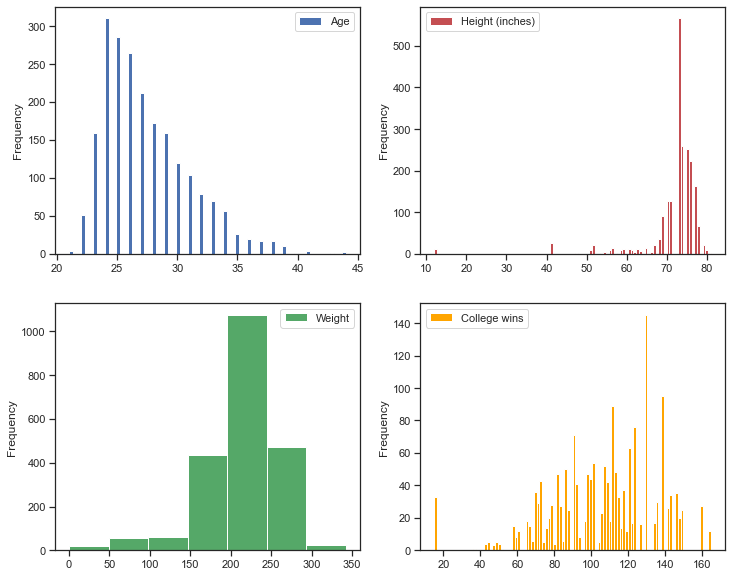

In [71]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
df_player.plot(kind='hist',y='Age',bins=70,color='b',ax = axes[0][0])
df_player.plot(kind='hist',y='Height (inches)',bins=100,color='r',ax = axes[0][1])
df_player.plot(kind='hist',y='Weight',bins=7,color='g',ax = axes[1][0])
df_player.plot(kind='hist',y='College wins',bins=100,color='orange',ax = axes[1][1])

<AxesSubplot:title={'center':'Age Vs Total_Y_A'}, xlabel='Age', ylabel='Total_Y_A'>

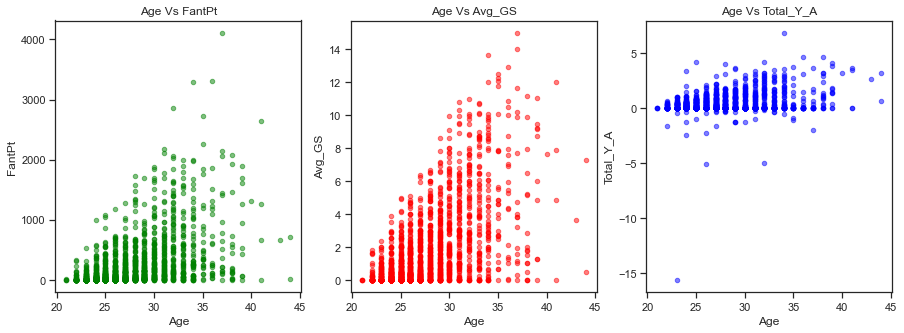

In [72]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
df_player.plot(kind='scatter',x='Age',y='FantPt',alpha=0.5,color='green',ax = axes[0],title="Age Vs FantPt")
df_player.plot(kind='scatter',x='Age',y='Avg_GS',alpha=0.5,color='red',ax = axes[1],title="Age Vs Avg_GS")
df_player.plot(kind='scatter',x='Age',y='Total_Y_A',alpha=0.5,color='blue',ax = axes[2],title="Age Vs Total_Y_A")

Text(0.5, 1.0, 'Players')

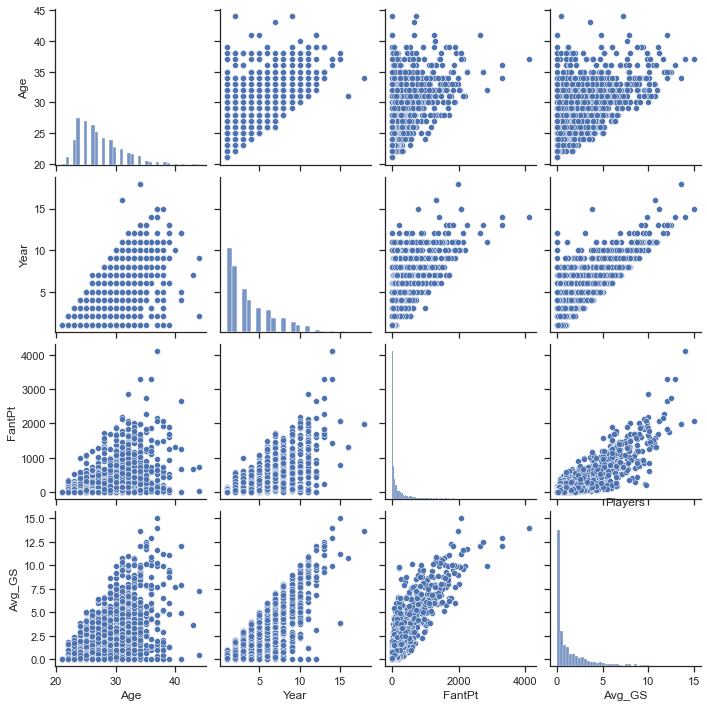

In [73]:
sns.set(style='ticks')
pal = ['#FA5858','#58D3F7']
columns_pair = ['Age','Year','FantPt','Avg_GS']
sns.pairplot(df_player[columns_pair],palette=pal)
plt.title('Players')

In [74]:
px.histogram(df_player,x='Player',y='FantPt',color='FantPos')

In [75]:
df_player[df_player.duplicated('Player',keep='last')]

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
22,8,Adrian Peterson,30,Gainesville,FL,8,106,6,1.0,1.0,...,0.0,14.0,0.00,0.00,1957.0,9.0,313.0,1.239860,0.479167,Adrian PetersonFL
40,1,Alex Smith,26,Denver,CO,1,14,12,0.0,0.0,...,0.0,28.0,0.00,0.00,250.0,3.0,0.0,0.000000,0.857143,Alex SmithCO
352,2,Chris Davis,24,St. Petersburg,FL,2,6,0,0.0,0.0,...,0.0,0.0,4.14,6.66,31.0,0.0,0.0,0.000000,0.000000,Chris DavisFL
364,7,Chris Henry,26,Oakland,CA,7,39,3,0.0,0.0,...,0.0,26.0,4.16,6.96,974.0,8.0,32.0,0.513566,0.333333,Chris HenryCA
1528,6,Mike Williams,27,Tampa,FL,6,80,60,0.0,0.0,...,0.0,8.0,4.31,6.90,3174.0,19.0,2.0,0.002624,4.235119,Mike WilliamsFL
1678,5,Reggie Brown,28,Carrollton,GA,5,72,45,0.0,0.0,...,0.0,0.0,4.00,6.99,2642.0,18.0,11.0,0.021890,2.942857,Reggie BrownGA
1716,9,Ricky Williams,34,San Diego,CA,9,115,51,1.0,3.0,...,0.0,32.5,0.00,0.00,8710.0,47.0,1662.0,1.951879,3.875000,Ricky WilliamsCA
2057,1,Troy Smith,22,Greenville,NC,1,1,0,0.0,0.0,...,0.0,35.5,4.24,7.25,14.0,0.0,0.0,0.000000,0.000000,Troy SmithNC
2133,4,Zach Miller,28,Tempe,AZ,4,62,58,0.0,0.0,...,0.0,0.0,4.42,7.01,2005.0,12.0,0.0,0.000000,3.732143,Zach MillerAZ


In [76]:
df_player[df_player.Player=='Adrian Peterson']

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
22,8,Adrian Peterson,30,Gainesville,FL,8,106,6,1.0,1.0,...,0.0,14.0,0.0,0.00,1957.0,9.0,313.0,1.239860,0.479167,Adrian PetersonFL
23,7,Adrian Peterson,28,Palestine,TX,7,103,96,0.0,0.0,...,16.0,0.0,4.4,7.09,11812.0,91.0,2033.0,1.217879,6.517857,Adrian PetersonTX


In [77]:
df_player[df_player.duplicated('UID',keep='last')]

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID


In [80]:
#sortby FantPoints
df_player.sort_values(by='FantPt',ascending=False).head(20).T

,1625,1990,666,1277,650,218,1662,138,1941,703,1437,2003,706,1627,1491,1904,287,1265,2013,967
Year,14,14,13,11,13,12,13,10,12,11,15,15,10,10,11,18,10,11,10,11
Player,Peyton Manning,Tom Brady,Drew Brees,LaDainian Tomlinson,Donovan McNabb,Brett Favre,Randy Moss,Ben Roethlisberger,Terrell Owens,Edgerrin James,Matt Hasselbeck,Tony Gonzalez,Eli Manning,Philip Rivers,Michael Vick,Steve Smith,Carson Palmer,Kurt Warner,Tony Romo,Jeff Garcia
Age,37,36,34,32,35,41,35,31,37,31,38,37,32,32,33,34,34,38,33,39
Hometown,New Orleans,San Mateo,Austin,Rosebud,Chicago,Gulfport,Rand,Findlay,Alexander City,Immokalee,Westwood,Torrance,New Orleans,Decatur,Newport News,Los Angeles,Fresno,Burlington,San Diego,Gilroy
Home State,LA,CA,TX,TX,IL,MS,WV,OH,AL,FL,MA,CA,LA,AL,VA,CA,CA,IA,CA,CA
Tm,14,14,13,11,13,12,13,10,12,11,15,15,10,10,11,18,10,11,10,11
G,224,193,186,170,167,189,202,143,171,148,197,238,153,132,128,231,138,123,136,125
GS,224,191,185,155,161,189,182,142,166,135,152,238,151,128,109,187,137,116,108,116
Cmp,5206.0,4178.0,4481.0,8.0,3170.0,3982.0,4.0,2749.0,0.0,0.0,3036.0,1.0,2929.0,2646.0,1703.0,0.0,2930.0,2662.0,2439.0,2264.0
Att,7877.0,6586.0,6799.0,12.0,5374.0,6413.0,8.0,4346.0,0.0,0.0,5030.0,1.0,5008.0,4108.0,3030.0,1.0,4682.0,4059.0,3775.0,3676.0


In [82]:
#Sortby Abg_GS
df_player.sort_values(by='Avg_GS',ascending=False).head(20)

,Year,Player,Age,Hometown,Home State,Tm,G,GS,Cmp,Att,...,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,UID
2003,15,Tony Gonzalez,37,Torrance,CA,15,238,238,1.0,1.0,...,NaN,NaN,NaN,NaN,14192.0,107.0,4.0,0.003897,15.000000,Tony GonzalezCA
1625,14,Peyton Manning,37,New Orleans,LA,14,224,224,5206.0,7877.0,...,NaN,NaN,NaN,NaN,61858.0,483.0,16140.0,3.656326,14.000000,Peyton ManningLA
1904,18,Steve Smith,34,Los Angeles,CA,18,231,187,0.0,1.0,...,0.0,0.0,4.19,6.68,15028.0,81.0,55.0,0.078314,13.630556,Steve SmithCA
1990,14,Tom Brady,36,San Mateo,CA,14,193,191,4178.0,6586.0,...,33.0,0.0,4.38,7.20,49938.0,373.0,13606.0,4.588923,12.933333,Tom BradyCA
650,13,Donovan McNabb,35,Chicago,IL,13,167,161,3170.0,5374.0,...,14.0,0.0,4.38,7.30,40728.0,263.0,11364.0,3.705285,12.500000,Donovan McNabbIL
826,13,Hines Ward,35,Forest Park,GA,13,201,190,0.0,1.0,...,NaN,NaN,NaN,NaN,12252.0,86.0,58.0,0.055016,12.287500,Hines WardGA
1688,13,Reggie Wayne,35,New Orleans,LA,13,196,182,0.0,1.0,...,0.0,0.0,0.00,0.00,13566.0,80.0,6.0,0.005781,12.067308,Reggie WayneLA
218,12,Brett Favre,41,Gulfport,MS,12,189,189,3982.0,6413.0,...,NaN,NaN,NaN,NaN,45626.0,298.0,13095.0,3.452673,12.000000,Brett FavreMS
666,13,Drew Brees,34,Austin,TX,13,186,185,4481.0,6799.0,...,28.0,0.0,4.21,7.09,51775.0,376.0,13931.0,3.519358,12.000000,Drew BreesTX
1662,13,Randy Moss,35,Rand,WV,13,202,182,4.0,8.0,...,NaN,NaN,NaN,NaN,14240.0,141.0,40.0,0.030285,11.750000,Randy MossWV


In [83]:
df_player.isnull().sum()

Year                  0
Player                0
Age                   0
Hometown              0
Home State            0
Tm                    0
G                     0
GS                    0
Cmp                   0
Att                   0
Yds                   0
TD                    0
Int                   0
Att.1                 0
Yds.1                 0
Y/A                   0
TD.1                  0
Rec                   0
Yds.2                 0
Y/R                   0
TD.2                  0
FantPos               0
FantPt                0
Height (inches)       0
Weight                0
College               1
Conference          113
College wins        383
College losses      383
DOB                   0
Draft Round           0
Draft Year            0
Wonderlic          1143
Bench Press        1143
Shuttle            1143
3Cone              1143
Total_Yds             0
Total_TD              0
Total_Att             0
Total_Y_A             0
Avg_GS                0
UID             

In [84]:
df_player.nunique()

Year                 17
Player             2132
Age                  23
Hometown            950
Home State           66
Tm                   17
G                   187
GS                  153
Cmp                 203
Att                 218
Yds                 277
TD                   97
Int                  86
Att.1               356
Yds.1               576
Y/A                 852
TD.1                 66
Rec                 349
Yds.2               947
Y/R                1234
TD.2                 69
FantPos               4
FantPt              624
Height (inches)      46
Weight              248
College             319
Conference           37
College wins         75
College losses       66
DOB                1836
Draft Round          13
Draft Year           32
Wonderlic            34
Bench Press          56
Shuttle              99
3Cone               133
Total_Yds          1233
Total_TD            126
Total_Att           486
Total_Y_A          1163
Avg_GS              953
UID             

In [85]:
df_player.columns

Index(['Year', 'Player', 'Age', 'Hometown', 'Home State', 'Tm', 'G', 'GS',
       'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1',
       'Rec', 'Yds.2', 'Y/R', 'TD.2', 'FantPos', 'FantPt', 'Height (inches)',
       'Weight', 'College', 'Conference', 'College wins', 'College losses',
       'DOB', 'Draft Round', 'Draft Year', 'Wonderlic', 'Bench Press',
       'Shuttle', '3Cone', 'Total_Yds', 'Total_TD', 'Total_Att', 'Total_Y_A',
       'Avg_GS', 'UID'],
      dtype='object')

In [87]:
df_player.describe()

,Year,Age,Tm,G,GS,Cmp,Att,Yds,TD,Int,...,Draft Year,Wonderlic,Bench Press,Shuttle,3Cone,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,...,2141.000000,998.000000,998.00000,998.000000,998.000000,2141.00000,2141.000000,2141.000000,2141.000000,2141.000000
mean,3.723494,27.359178,3.723494,42.002335,20.815974,69.792620,116.528725,804.631948,4.792620,3.557683,...,1175.712284,3.554108,16.41984,3.203216,5.302876,1970.20411,12.204110,327.099953,inf,1.584503
std,2.856564,3.674539,2.856564,41.811007,33.343073,355.583668,577.261069,4136.060586,26.489214,16.776348,...,986.202227,9.287592,13.37358,1.860032,3.110061,4640.93795,30.658016,1218.922339,NaN,2.345012
min,1.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,-5.00000,0.000000,0.000000,-15.639175,0.000000
25%,1.000000,25.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.932500,0.000000,39.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,26.000000,3.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1996.000000,0.000000,19.00000,4.180000,6.960000,353.00000,2.000000,2.000000,0.008615,0.541346
75%,5.000000,29.000000,5.000000,62.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2004.000000,0.000000,27.00000,4.330000,7.200000,1853.00000,11.000000,53.000000,0.402216,2.123377
max,18.000000,44.000000,18.000000,238.000000,238.000000,5206.000000,7877.000000,61225.000000,465.000000,218.000000,...,2013.000000,48.000000,43.50000,5.010000,8.380000,61858.00000,483.000000,16140.000000,inf,15.000000


In [88]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2140
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2141 non-null   int64  
 1   Player           2141 non-null   object 
 2   Age              2141 non-null   int64  
 3   Hometown         2141 non-null   object 
 4   Home State       2141 non-null   object 
 5   Tm               2141 non-null   int64  
 6   G                2141 non-null   int64  
 7   GS               2141 non-null   int64  
 8   Cmp              2141 non-null   float64
 9   Att              2141 non-null   float64
 10  Yds              2141 non-null   float64
 11  TD               2141 non-null   float64
 12  Int              2141 non-null   float64
 13  Att.1            2141 non-null   float64
 14  Yds.1            2141 non-null   float64
 15  Y/A              2141 non-null   float64
 16  TD.1             2141 non-null   float64
 17  Rec           

In [89]:
game_cols = ['Year','UID','Player','Age','Hometown','Home State','Tm','FantPt','G','GS','Cmp','Att','Yds','TD','Int','Att.1',
            'Yds.1','Y/A','TD.1','Rec','Yds.2','Y/R','TD.2','FantPos','Total_Yds','Total_TD','Total_Att', 'Total_Y_A',
       'Avg_GS','Height (inches)','Weight']
draft_cols = ['Year', 'UID','Player', 'Age', 'Hometown', 'Home State', 'Tm','Height (inches)',
       'Weight', 'College', 'Conference', 'College wins', 'College losses',
       'DOB', 'Draft Round', 'Draft Year', 'Wonderlic', 'Bench Press',
       'Shuttle', '3Cone']

In [90]:
df_game = df_player[game_cols]
df_draft = df_player[draft_cols]

In [91]:
df_game.isnull().sum()

Year               0
UID                0
Player             0
Age                0
Hometown           0
Home State         0
Tm                 0
FantPt             0
G                  0
GS                 0
Cmp                0
Att                0
Yds                0
TD                 0
Int                0
Att.1              0
Yds.1              0
Y/A                0
TD.1               0
Rec                0
Yds.2              0
Y/R                0
TD.2               0
FantPos            0
Total_Yds          0
Total_TD           0
Total_Att          0
Total_Y_A          0
Avg_GS             0
Height (inches)    0
Weight             0
dtype: int64

In [38]:
df_draft.isnull().sum()

Year                  0
UID                   0
Player                0
Age                   0
Hometown              0
Home State            0
Tm                    0
Height (inches)       0
Weight                0
College               1
Conference          113
College wins        383
College losses      383
DOB                   0
Draft Round           0
Draft Year            0
Wonderlic          1143
Bench Press        1143
Shuttle            1143
3Cone              1143
dtype: int64

In [101]:
df_game_1 = df_game.fillna(0)

In [103]:
df_game_1 

,Year,UID,Player,Age,Hometown,Home State,Tm,FantPt,G,GS,...,Y/R,TD.2,FantPos,Total_Yds,Total_TD,Total_Att,Total_Y_A,Avg_GS,Height (inches),Weight
0,6,A.J. FeeleyID,A.J. Feeley,34,Caldwell,ID,6,250.0,28,18,...,0.00,0.0,QB,4667.0,29.0,1561.0,1.773987,2.827273,75.0,187.500000
1,3,A.J. GreenSC,A.J. Green,25,Summerville,SC,3,565.0,47,47,...,44.73,29.0,WR,3924.0,29.0,9.0,0.007386,3.000000,76.0,205.000000
2,2,A.J. JenkinsFL,A.J. Jenkins,24,Jacksonville,FL,2,14.0,19,1,...,16.25,0.0,WR,136.0,0.0,2.0,0.014706,0.062500,73.0,192.000000
3,1,A.J. OfodileMI,A.J. Ofodile,26,Detroit,MI,1,3.0,7,3,...,6.25,0.0,TE,25.0,0.0,0.0,0.000000,0.428571,78.0,260.000000
4,7,Aaron BrooksVA,Aaron Brooks,30,Newport News,VA,7,1362.0,93,90,...,1.00,0.0,QB,21796.0,136.0,6288.0,2.029161,6.625000,76.0,125.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2,Zachary HiltonDC,Zachary Hilton,25,Washington,DC,2,46.0,18,6,...,11.31,1.0,TE,396.0,1.0,0.0,0.000000,0.400000,80.0,262.000000
2137,9,Zack CrockettFL,Zack Crockett,35,Pompano Beach,FL,9,384.0,126,40,...,45.05,1.0,RB,1664.0,36.0,381.0,inf,2.514423,74.0,240.000000
2138,1,Zack PianaltoAR,Zack Pianalto,22,Springdale,AR,1,4.0,13,0,...,10.00,0.0,TE,40.0,0.0,0.0,0.000000,0.000000,75.0,245.000000
2139,5,Zeron FlemisterIA,Zeron Flemister,29,Sioux City,IA,5,69.0,60,20,...,43.38,4.0,TE,439.0,4.0,0.0,0.000000,1.529167,76.0,250.000000


In [105]:
cols = ['Year','Age','G','Cmp','Att','Yds','TD','Int','Att.1',
        'Yds.1','Y/A','TD.1', 'Rec', 'Yds.2','Y/R','TD.2','FantPos',
        'Height (inches)','Weight','Avg_GS','FantPt']

## df_new

In [108]:
df_new = df_game_1[cols]
df_new 

,Year,Age,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,TD.1,Rec,Yds.2,Y/R,TD.2,FantPos,Height (inches),Weight,Avg_GS,FantPt
0,6,34,28,425.0,762.0,4618.0,28.0,31.0,37.0,49.0,...,1.0,0.0,0.0,0.00,0.0,QB,75.0,187.500000,2.827273,250.0
1,3,25,47,0.0,0.0,0.0,0.0,0.0,9.0,91.0,...,0.0,260.0,3833.0,44.73,29.0,WR,76.0,205.000000,3.000000,565.0
2,2,24,19,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,0.0,8.0,130.0,16.25,0.0,WR,73.0,192.000000,0.062500,14.0
3,1,26,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,25.0,6.25,0.0,TE,78.0,260.000000,0.428571,3.0
4,7,30,93,1673.0,2963.0,20261.0,123.0,92.0,362.0,1534.0,...,13.0,1.0,1.0,1.00,0.0,QB,76.0,125.714286,6.625000,1362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2,25,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.0,396.0,11.31,1.0,TE,80.0,262.000000,0.400000,46.0
2137,9,35,126,0.0,0.0,0.0,0.0,0.0,381.0,1232.0,...,35.0,66.0,432.0,45.05,1.0,RB,74.0,240.000000,2.514423,384.0
2138,1,22,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,40.0,10.00,0.0,TE,75.0,245.000000,0.000000,4.0
2139,5,29,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,38.0,439.0,43.38,4.0,TE,76.0,250.000000,1.529167,69.0


In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2140
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2141 non-null   int64  
 1   Age              2141 non-null   int64  
 2   G                2141 non-null   int64  
 3   Cmp              2141 non-null   float64
 4   Att              2141 non-null   float64
 5   Yds              2141 non-null   float64
 6   TD               2141 non-null   float64
 7   Int              2141 non-null   float64
 8   Att.1            2141 non-null   float64
 9   Yds.1            2141 non-null   float64
 10  Y/A              2141 non-null   float64
 11  TD.1             2141 non-null   float64
 12  Rec              2141 non-null   float64
 13  Yds.2            2141 non-null   float64
 14  Y/R              2141 non-null   float64
 15  TD.2             2141 non-null   float64
 16  FantPos          2141 non-null   object 
 17  Height (inches

In [113]:
#encode categorical FantPos variable
df_encoded = pd.get_dummies(df_new, columns = ['FantPos'])
df_encoded.head()

,Year,Age,G,Cmp,Att,Yds,TD,Int,Att.1,Yds.1,...,Y/R,TD.2,Height (inches),Weight,Avg_GS,FantPt,FantPos_QB,FantPos_RB,FantPos_TE,FantPos_WR
0,6,34,28,425.0,762.0,4618.0,28.0,31.0,37.0,49.0,...,0.00,0.0,75.0,187.500000,2.827273,250.0,1,0,0,0
1,3,25,47,0.0,0.0,0.0,0.0,0.0,9.0,91.0,...,44.73,29.0,76.0,205.000000,3.000000,565.0,0,0,0,1
2,2,24,19,0.0,0.0,0.0,0.0,0.0,2.0,6.0,...,16.25,0.0,73.0,192.000000,0.062500,14.0,0,0,0,1
3,1,26,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.25,0.0,78.0,260.000000,0.428571,3.0,0,0,1,0
4,7,30,93,1673.0,2963.0,20261.0,123.0,92.0,362.0,1534.0,...,1.00,0.0,76.0,125.714286,6.625000,1362.0,1,0,0,0


In [114]:
df_encoded.columns

Index(['Year', 'Age', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       'Y/A', 'TD.1', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Height (inches)',
       'Weight', 'Avg_GS', 'FantPt', 'FantPos_QB', 'FantPos_RB', 'FantPos_TE',
       'FantPos_WR'],
      dtype='object')

In [119]:
x_cols = ['Year', 'Age', 'G', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1',
       'Y/A', 'TD.1', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Height (inches)',
       'Weight','FantPt', 'FantPos_QB', 'FantPos_RB', 'FantPos_TE',
       'FantPos_WR']

### X and Y

In [120]:
y_cols = 'Avg_GS'
x = df_encoded[x_cols]
y = df_encoded[y_cols]

In [122]:
#scale data
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()
model = scaler.fit(x)
x_scaled = model.transform(x)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.3, random_state =4 )

In [131]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1498, 23)
(643, 23)
(1498,)
(643,)


## Linear Regression

In [132]:
#instance
lr = LinearRegression()

In [133]:
#fit
lr.fit(x_train,y_train)

LinearRegression()

In [134]:
#prdict
pred = lr.predict(x_test)

In [136]:
mean_absolute_error(y_test, pred)

0.486604112051602

In [137]:
mean_squared_error(y_test, pred)

0.4721051715861839

In [138]:
np.sqrt(mean_squared_error(y_test, pred))

0.6870990988104874

In [139]:
#train score / accuracy
lr.score(x_train,y_train)

0.8900915230063425

In [140]:
#test score / accuracy
lr.score(x_test,y_test)

0.9049579572632437

## SGD Regression

In [152]:
from sklearn.linear_model import SGDRegressor

In [156]:
sgd = linear_model.SGDRegressor()
sgd = sgd.fit(x_train,y_train)

In [157]:
#train score
sgd.score(x_train,y_train)

0.885454494140436

In [158]:
#test score
sgd.score(x_test,y_test)

0.9034703566979381

In [ ]:
mean_squared_error(y_test, pred)

## Ridge Regression

In [161]:
regr_ridge = linear_model.Ridge(alpha=0.0001)
regr_ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [162]:
mean_squared_error(y_test, regr_ridge .predict(x_test), multioutput = 'uniform_average')

0.4720912909425796

In [164]:
#train score / accuracy
r2_score(y_train, regr_ridge .predict(x_train))

0.8900914670271584

In [165]:
#test  score / accuracy
r2_score(y_test, regr_ridge .predict(x_test))

0.9049607516506006

## Polynomial Regrssion

In [202]:
polytrans = PolynomialFeatures(degree = 2)
data = polytrans.fit_transform(x_scaled)

In [203]:
x_scaled.shape

(2141, 23)

In [204]:
data.shape

(2141, 300)

In [205]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(data,y,test_size = 0.3, random_state =4 )

In [206]:
#instance
lr = LinearRegression()

In [207]:
#fit
lr.fit(x_train_poly,y_train_poly)

LinearRegression()

In [208]:
#prdict
pred = lr.predict(x_test_poly)

In [209]:
mean_absolute_error(y_test_poly, pred)

1.0342676239601987

In [210]:
mean_squared_error(y_test_poly, pred)

151.08598042093777

In [211]:
np.sqrt(mean_squared_error(y_test_poly, pred))

12.291703723281723

In [187]:
#train score / accuracy
lr.score(x_train_poly,y_train_poly)

0.9580082838836272

In [189]:
#test score / accuracy
lr.score(x_test_poly,y_test_poly)

-29.415934991447426

## Decision Tree

In [244]:
decision_tree_reg = DecisionTreeRegressor(max_depth =3, random_state=13)
decision_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=13)

In [245]:
#prdict
pred = decision_tree_reg.predict(x_test)

In [246]:
mean_absolute_error(y_test, pred)

0.6163900807011223

In [247]:
mean_squared_error(y_test, pred)

0.8294727757435715

In [248]:
np.sqrt(mean_squared_error(y_test, pred))

0.9107539600482512

In [249]:
#train score / accuracy
decision_tree_reg.score(x_train,y_train)

0.8288721361054797

In [250]:
#test score / accuracy
decision_tree_reg.score(x_test,y_test)

0.8330143541187518

## Random Forest

In [253]:
random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth = 4, random_state = 13)
random_forest_reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=13)

In [256]:
#prdict
pred = random_forest_reg.predict(x_test)

In [257]:
mean_absolute_error(y_test, pred)

0.45755384015166656

In [258]:
mean_squared_error(y_test, pred)

0.42859034460985224

In [259]:
np.sqrt(mean_squared_error(y_test, pred))

0.6546681179115509

In [260]:
#train score / accuracy
random_forest_reg.score(x_train,y_train)

0.9243958171304625

In [261]:
#test score / accuracy
random_forest_reg.score(x_test,y_test)

0.9137181621796011